In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [2]:
label, Niter, Nwalkers, Scale = "simple_emcee_1", 20000, 2, {'a':0.000001, 'm':0.00000001}

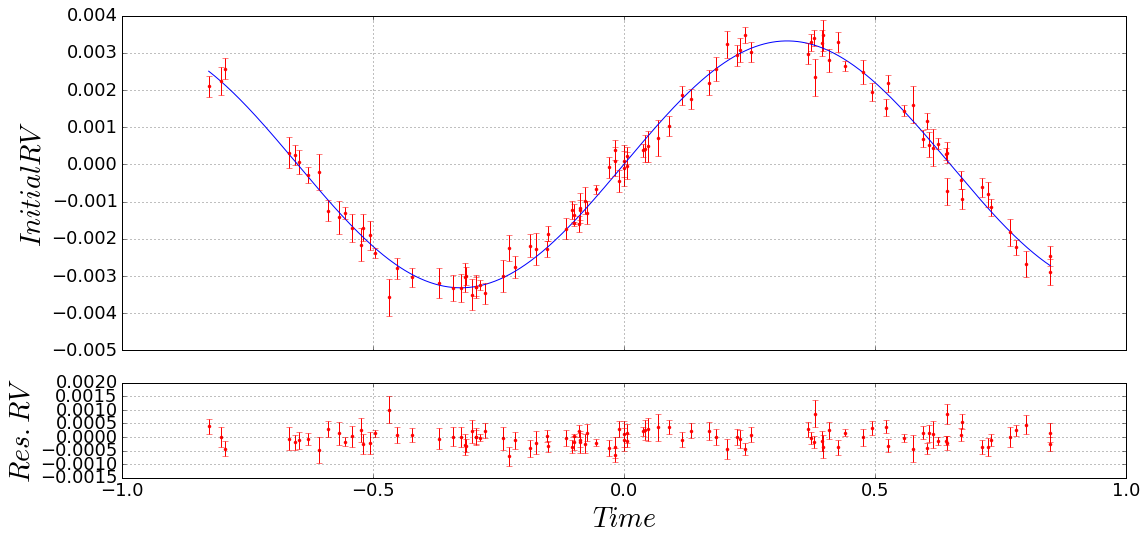

In [3]:
initial_state = state.State(planets= [{'a':0.3500, 'm':0.001965}], ignore_vars='m')
start_state = state.State(planets= [{'a':0.3800, 'm':0.001965}], ignore_vars='m')
obs = driver.createObs(initial_state, 100, 3.0e-4, 9e-5, 1.7)
driver.inLinePlotObs(initial_state, obs, [18,6])

In [4]:
em_bundle, em_h = driver.createEns(label, Niter, start_state, obs, Nwalkers, Scale, printing_every=2000)

Progress: 0.01%, time: 2017-02-28 05:22:10.769224
Progress: 20.01%, time: 2017-02-28 05:22:25.724087
Progress: 40.01%, time: 2017-02-28 05:22:37.684012
Progress: 60.01%, time: 2017-02-28 05:22:49.827525
Progress: 80.01%, time: 2017-02-28 05:23:01.862092
Error(s): 0
Acceptance rate: 100.000%
The id of the simulation is: 25bf8f23417de1e26092a04d2d1cd166
The end time of the simulation is 2017-02-28 05:23:14.045537


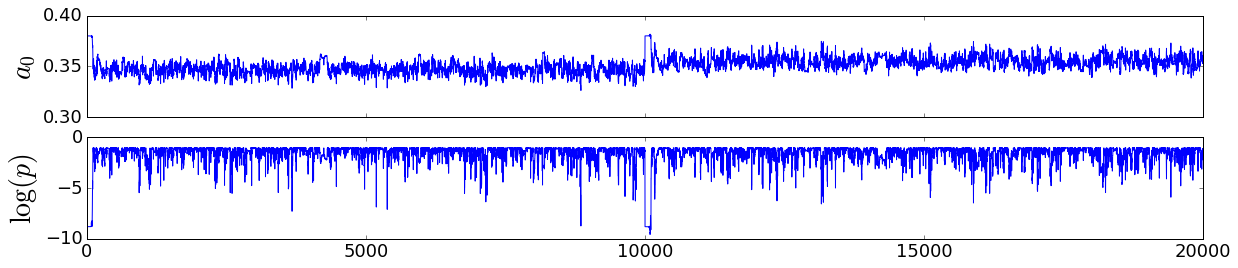

In [5]:
driver.inLinePlotChains(em_bundle, [20,4])

Eliminated burn in, sampled every 2, for every walker.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$']
[ 0.35085151]


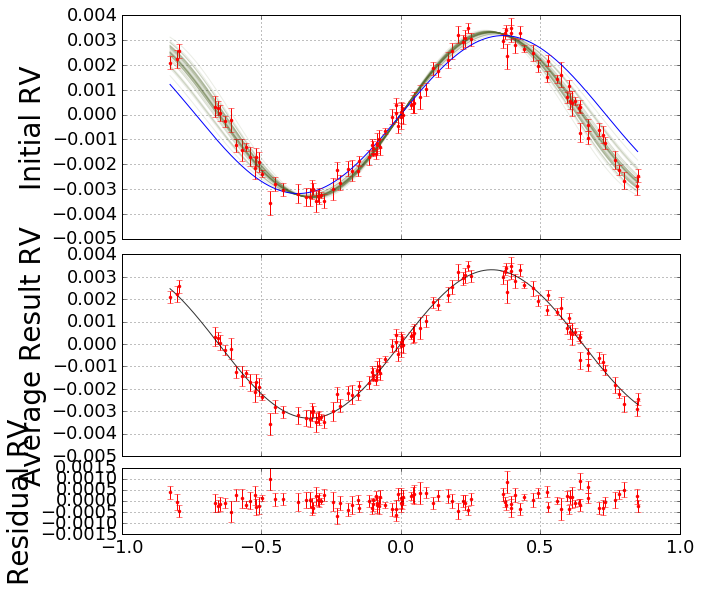

In [6]:
trimmedResEM, trimmedlogpEM = driver.inLinePlotResults(em_bundle, 50, [10,4], 0.5, 2)

AC time 12.5


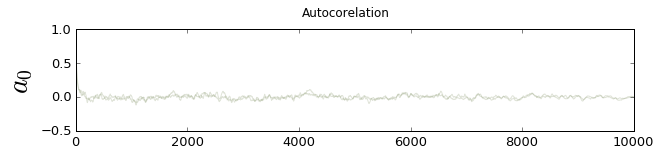

In [7]:
actimesEM = driver.inLinePlotAcTimes(em_bundle, [10, 4])

# Smala

In [8]:
sm_bundle, sm_h = driver.createSMALA(label, Niter/4, start_state, obs, 1.25, 0.14, printing_every=300)

Progress: 0.02%, 7 tries have been made, time: 2017-02-28 05:23:16.823548
Progress: 6.02%, 359 tries have been made, time: 2017-02-28 05:23:20.364298
Progress: 12.02%, 722 tries have been made, time: 2017-02-28 05:23:23.893738
Progress: 18.02%, 1082 tries have been made, time: 2017-02-28 05:23:27.415764
Progress: 24.02%, 1447 tries have been made, time: 2017-02-28 05:23:30.937301
Progress: 30.02%, 1809 tries have been made, time: 2017-02-28 05:23:34.444338
Progress: 36.02%, 2174 tries have been made, time: 2017-02-28 05:23:38.010581
Progress: 42.02%, 2541 tries have been made, time: 2017-02-28 05:23:41.557788
Progress: 48.02%, 2900 tries have been made, time: 2017-02-28 05:23:45.032696
Progress: 54.02%, 3260 tries have been made, time: 2017-02-28 05:23:48.525179
Progress: 60.02%, 3627 tries have been made, time: 2017-02-28 05:23:52.109359
Progress: 66.02%, 3982 tries have been made, time: 2017-02-28 05:23:55.764695
Progress: 72.02%, 4332 tries have been made, time: 2017-02-28 05:23:59.

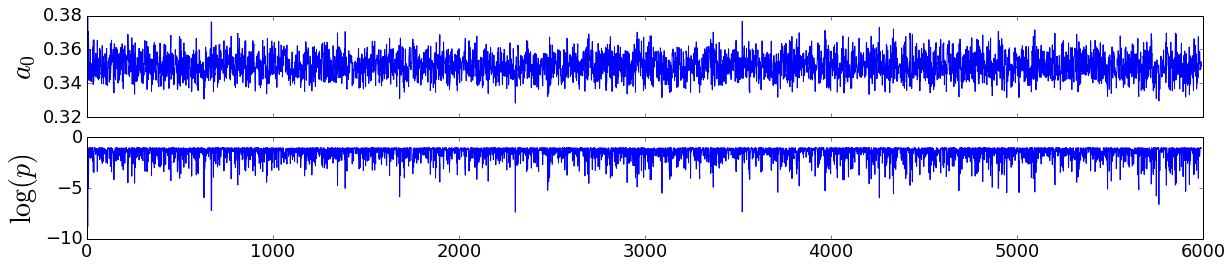

In [9]:
driver.inLinePlotChains(sm_bundle, [20,4])

Eliminated burn in, sampled every 1, for every walker.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$']
[ 0.35049269]


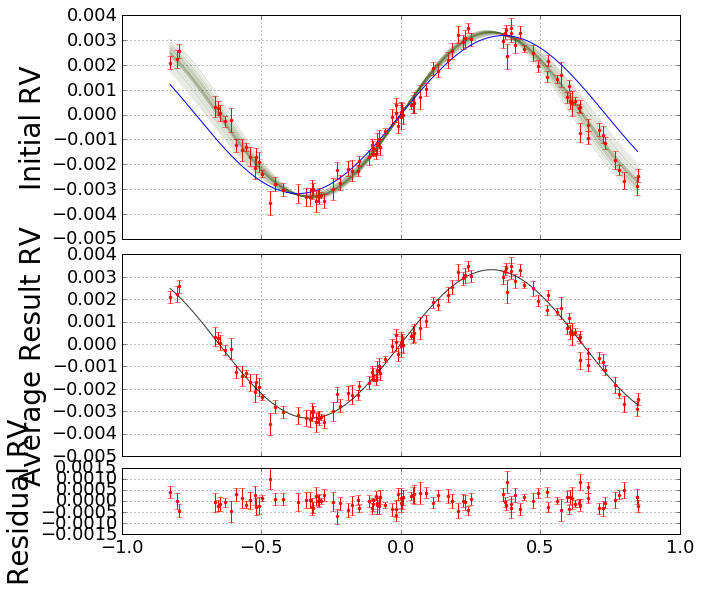

In [10]:
trimmedResSM, trimmedlogpSM = driver.inLinePlotResults(sm_bundle, 50, [10,4], 0.3, 1)

AC time 1.0


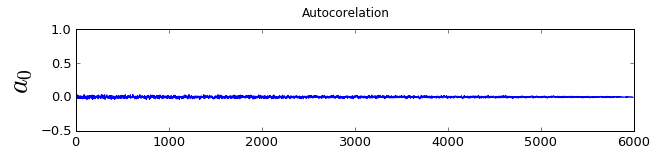

In [11]:
actimesSM = driver.inLinePlotAcTimes(sm_bundle, [10,4])

# Comparison

In [12]:
from scipy import stats

def showCDF(chain1, chain2, size):
    for i in range(len(np.transpose(chain1))):
        fig = plt.figure(figsize=(size[0],size[1]))
        plt.plot(sorted(np.transpose(chain1)[i]), np.linspace(0,1, len(np.transpose(chain1)[i])))
        plt.plot(sorted(np.transpose(chain2)[i]), np.linspace(0,1, len(np.transpose(chain2)[i])))
        plt.ylabel('Fractionsl CDF')
        
def calcKStatistic(chain1, chain2):
    for i in range(len(np.transpose(chain1))):
        print stats.ks_2samp(np.transpose(chain1)[i], np.transpose(chain2)[i])

In [13]:
calcKStatistic(sm_bundle.mcmc_chain, em_bundle.mcmc_chain)

Ks_2sampResult(statistic=0.042468502754131221, pvalue=1.1302733807555312e-07)


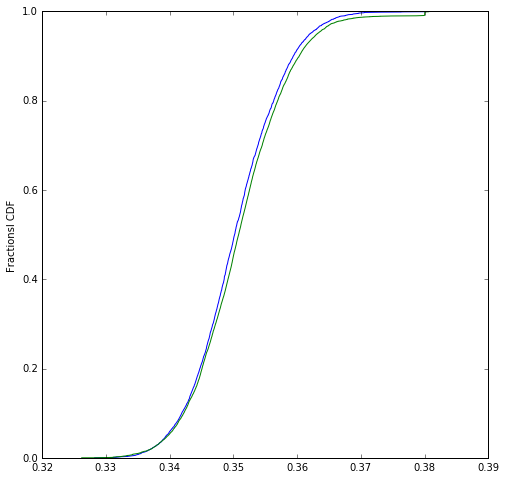

In [19]:
showCDF(sm_bundle.mcmc_chain, em_bundle.mcmc_chain, [8,8])

In [15]:
calcKStatistic(trimmedResSM, trimmedResEM)

Ks_2sampResult(statistic=0.038314285714285745, pvalue=0.0045887072192841551)


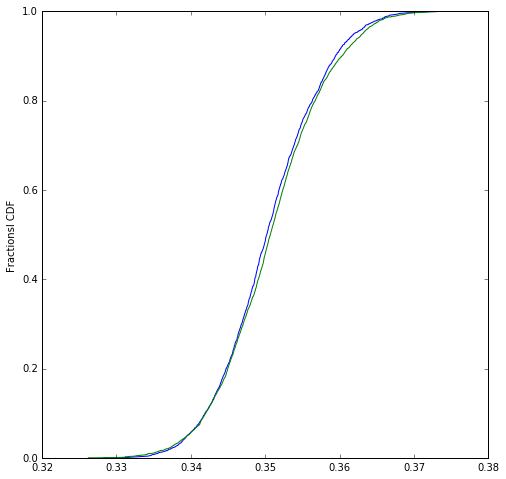

In [18]:
showCDF(trimmedResSM, trimmedResEM, [8,8])